# Régression multidimensionnelle

Un exemple réel de régression multiple.

## Données

In [2]:
import pandas

In [3]:
communities = pandas.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data', header=None, na_values='?')

column_names = ['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop']

communities.columns = column_names

moyennes = communities.loc[:, 'population':].mean()
communities_no_missing = communities.fillna(moyennes) # on remplace les Na par  la valeur associée à la clé du dict de nom de la colonne.
communities_no_missing = communities_no_missing.drop(labels=communities_no_missing.columns[:5], axis=1)

communities_no_missing

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


## Régression

On commence par centrer et réduire les données. Ceci est important pour l'interprétation d'une régression multi-linéaire car cela rend les coefficients de la régression comparable entre eux.

In [4]:
# centrer/réduit les données utiles (colonnes d'index >= 5)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = pandas.DataFrame(scaler.fit_transform(communities_no_missing), 
                     columns=communities_no_missing.columns)


On veut expliquer la dernière colonne (la variable `ViolentCrimesPerPop`), par une combinaison linéaire de toutes les autres toutes les colonnes sauf la dernière.

In [5]:
# extraction des données

y = scaled_data['ViolentCrimesPerPop']

X = scaled_data.loc[:, scaled_data.columns != 'ViolentCrimesPerPop']


In [7]:
# régressions multi-linéaire

import statsmodels.api

X = statsmodels.api.add_constant(X) # important sinon régression sans ajout de constante

results = statsmodels.api.OLS(y, X).fit()

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.700
Model:                             OLS   Adj. R-squared:                  0.680
Method:                  Least Squares   F-statistic:                     35.76
Date:                 Wed, 11 Jan 2023   Prob (F-statistic):               0.00
Time:                         18:16:00   Log-Likelihood:                -1629.5
No. Observations:                 1994   AIC:                             3505.
Df Residuals:                     1871   BIC:                             4193.
Df Model:                          122                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.547e-15      0.013  -1.22e-13      1.000      -0.025       0.025
population                0.0799      0.219      0.366      0.715      -0.349       0.509
householdsize            -0.0127      0.061     -0.210      0.834      -0.132       0.106
racepctblack              0.2036      0.056      3.614      0.000       0.093       0.314
racePctWhite             -0.0484      0.062     -0.782      0.434      -0.170       0.073
racePctAsian             -0.0249      0.031     -0.796      0.426      -0.086       0.036
racePctHisp               0.0577      0.055      1.041      0.298      -0.051       0.166
agePct12t21               0.0750      0.071      1.058      0.290      -0.064       0.214
agePct12t29              -0.1558      0.097     -1.609      0.108      -0.346       0.034
agePct16t24              -0.0937      0.118     -0.793      0.428      -0.325       0.138
agePct65up                0.0441      0.080      0.551      0.581      -0.113       0.201
numbUrban                -0.1361      0.214     -0.636      0.525      -0.556       0.284
pctUrban                  0.0896      0.030      2.975      0.003       0.031       0.149
medIncome                -0.1828      0.156     -1.172      0.241      -0.489       0.123
pctWWage                 -0.1491      0.070     -2.122      0.034      -0.287      -0.011
pctWFarmSelf              0.0401      0.018      2.271      0.023       0.005       0.075
pctWInvInc               -0.1396      0.052     -2.699      0.007      -0.241      -0.038
pctWSocSec                0.0648      0.080      0.808      0.419      -0.092       0.222
pctWPubAsst               0.0085      0.044      0.192      0.847      -0.078       0.095
pctWRetire               -0.0705      0.027     -2.652      0.008      -0.123      -0.018
medFamInc                 0.2627      0.137      1.914      0.056      -0.007       0.532
perCapInc                 0.0939      0.158      0.595      0.552      -0.215       0.403
whitePerCap              -0.2952      0.125     -2.355      0.019      -0.541      -0.049
blackPerCap              -0.0262      0.019     -1.397      0.163      -0.063       0.011
indianPerCap             -0.0249      0.014     -1.812      0.070      -0.052       0.002
AsianPerCap               0.0181      0.016      1.140      0.254      -0.013       0.049
OtherPerCap               0.0356      0.015      2.318      0.021       0.005       0.066
HispPerCap                0.0254      0.020      1.297      0.195      -0.013       0.064
NumUnderPov               0.0462      0.088      0.523      0.601      -0.127       0.220
PctPopUnderPov           -0.1728      0.062     -2.789      0.005      -0.294      -0.051
PctLess9thGrade          -0.1046      0.062     -1.680      0.093      -0.227       0.018
PctNotHSGrad

Le coefficient de correlation $R^2$ vaut .7, ce qui est bien mais pas top.

On veut regarder les contributions par coefficient décroissants (des plus importants dans la régression aux moins important).

In [9]:
coefficients_regression = pandas.DataFrame(results.params, columns=['coef'])

coefficients_regression

,coef
const,-1.547048e-15
population,7.994772e-02
householdsize,-1.273759e-02
racepctblack,2.035857e-01
racePctWhite,-4.840042e-02
...,...
PolicOperBudg,1.576706e-01
LemasPctPolicOnPatr,-2.633213e-02
LemasGangUnitDeploy,2.665836e-02
LemasPctOfficDrugUn,4.080113e-02


In [10]:
coef_trié = (coefficients_regression
                .assign(valeure_absolue=abs(coefficients_regression['coef']))
                .sort_values(by=['valeure_absolue'], ascending=False)
                .drop('valeure_absolue', axis='columns')
)
coef_trié

,coef
LemasSwFTPerPop,-5.800871e+00
PolicPerPop,5.774691e+00
PctPersOwnOccup,-5.307763e-01
PersPerOccupHous,4.574394e-01
PctRecImmig8,4.440998e-01
...,...
PopDens,-6.761833e-03
LemasTotReqPerPop,5.885449e-03
PctTeen2Par,-2.962306e-03
OwnOccHiQuart,-9.680331e-04


On va représenter les 5 plus gros contributeurs

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

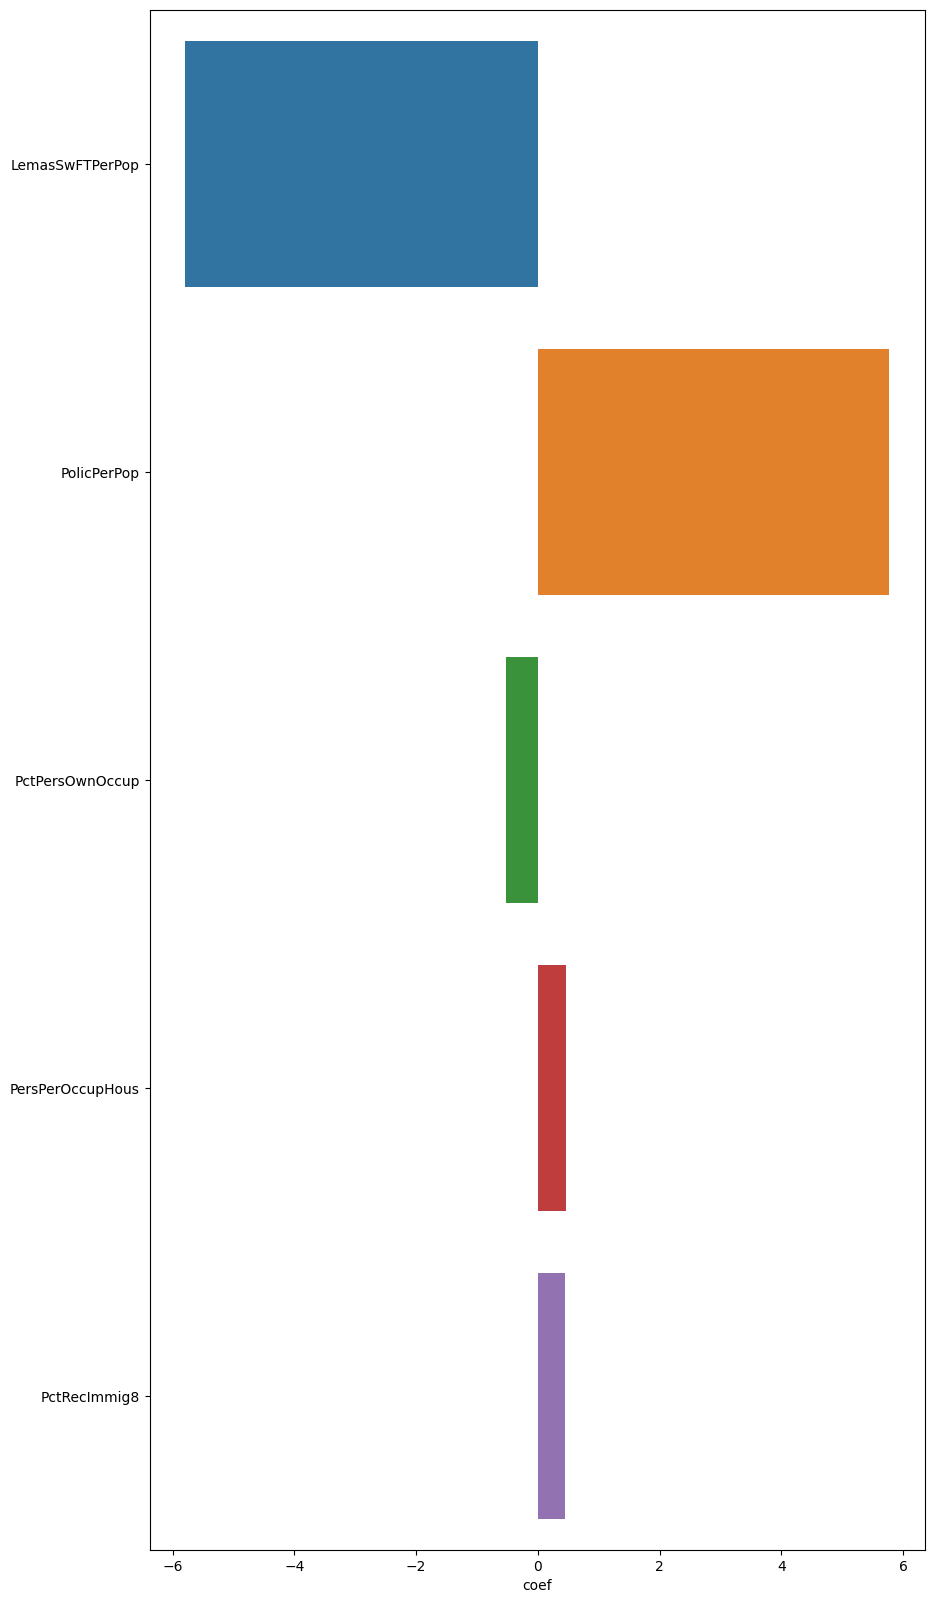

In [13]:
fig, ax = plt.subplots(figsize=(10, 20))

sns.barplot(x='coef',
            y=coef_trié.index[:5], 
            data=coef_trié[:5], ax=ax)
plt.show()

La régression semble influencée très négativement par `LemasSwFTPerPop` et très positivement par `PolicPerPop`

> Qu'en pensez-vous ?